In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# supaya bisa langsung keluar plot di notebook
%matplotlib inline

In [3]:
# membaca file .csv dan menjadikan kolom id sebagai index
df = pd.read_csv('./data/fuel-econ.csv', index_col='id')
df.head()

,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
id,,,,,,,,,,,,,,,,,,,
32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Bivariate - perbandingan 2 variabel

# Part 1 - Numerik vs Numerik

### Scatterplot & Correlation 

> Apa hubungan antara displ & comb

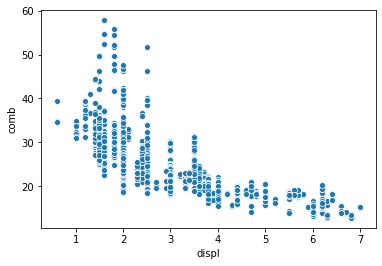

In [5]:
# scatterplot antara kolom displ dan comb
sns.scatterplot(x='displ', y='comb', data=df);

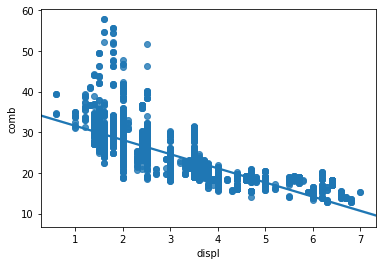

In [6]:
# scatterplot + garis regresi pada kolom displ dan comb
sns.regplot(x='displ', y='comb', data=df);

Text(0.5, 0.98, 'Displ vs Cylinder ...')

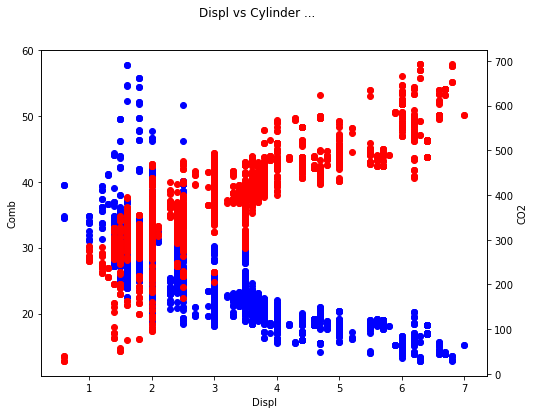

In [12]:
# menyiapkan kanvas menggunakan matplotlib, ubah ukuran plot dengan mengubah nilai pada figsize
fig, ax1 = plt.subplots(figsize=(8, 6))

# membuat scatterplot dan memberikan warna biru
ax1.scatter(x='displ', y='comb', data=df, c='b')
ax1.set_ylabel('Comb') # memberikan label pada sumbu y
ax1.set_xlabel('Displ') # memberikan label pada sumbu x

ax2 = ax1.twinx() # bikin kembaran

# membuat scatterplot ke-2
ax2.scatter(x='displ', y='co2', data=df, c='r')
ax2.set_ylabel('CO2') # memberikan label pada sumbu y ke-2

fig.suptitle('Displ vs Cylinder ...') # memberi judul pada plot

# Part 2 - Kategorik vs Numerik 

ada beberapa pilihan plot:
- Boxplot
- Violin plot
- Line plot

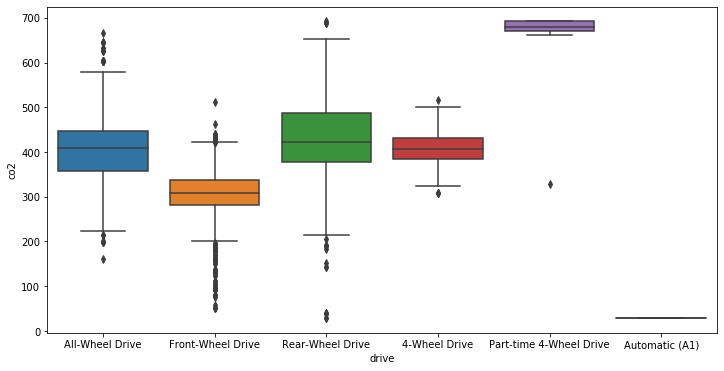

In [16]:
# membuat boxplot pada kolom drive dan co2. Boxplot dapat digunakan untuk melihat sebaran data apakah ada outliers
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.boxplot(x='drive', y='co2', data=df);

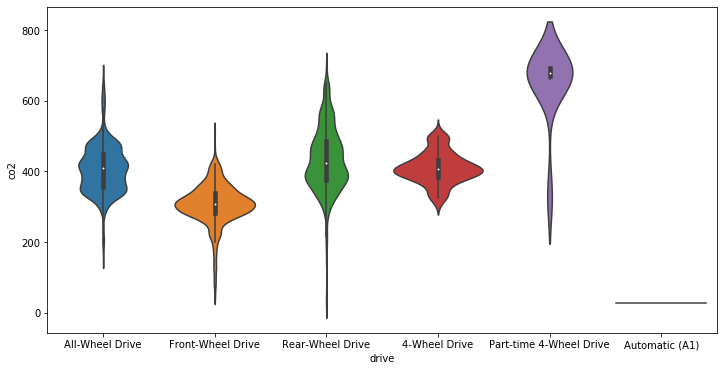

In [17]:
# membuat violinplot pada kolom drive dan co2. Pada violin plot, outliers tidak bisa dilihat.
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.violinplot(x='drive', y='co2', data=df)

# Part 3 - Kategorik vs Kategorik 

### Clustered Bar Chart 

In [18]:
df.head()

,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
id,,,,,,,,,,,,,,,,,,,
32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [27]:
# membuat fungsi dimana input x akan di split berdasarkan white space dan mengambil data pertama dari hasil split
# note: hasil split berupa list
def get_trans(x):
    return x.split(' ')[0]

In [28]:
# mengaplikasikan fungsi get_trans pada kolom trans untuk mengekstrak data automatic dan manual
df['transmission'] = df['trans'].apply(get_trans)

In [30]:
df['transmission'].value_counts()

Automatic    3068
Manual        861
Name: transmission, dtype: int64

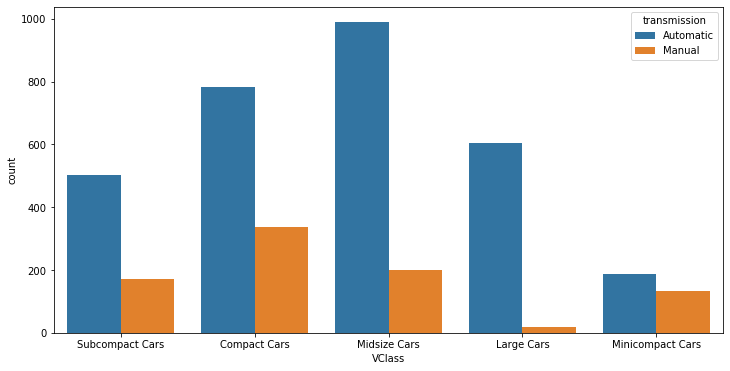

In [33]:
# membuat cluster barplot pada kolom VClass yang dibedakan pewarnaannya berdasarkan kolom transmission
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.countplot(x='VClass', data=df, hue='transmission');